# ==================== Calcula Resultado Anual ====================

In [1]:
from pandas import Series
import pandas as pd
from datetime import date, datetime
from IPython.display import display, Markdown
import matplotlib as mat
pd.__version__

'1.3.4'

In [2]:
import time
time.asctime( time.localtime(time.time()) )

'Fri Oct 25 11:32:08 2024'

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
# Setando opção do Pandas para mostrar todas as linhas
pd.set_option('display.max_rows', None)

## === ANO ===

In [4]:
ano = 2024

In [5]:
# Setando definição de cores
def color_negative_red(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

In [6]:
import subprocess
p = subprocess.call(["powershell.exe", "copy 'Gerenciador de Ações.v6.xlsx' tempfile.xlsx"])

In [7]:
# Leitura de planilha Excel
ws = pd.read_excel('tempfile.xlsx', sheet_name="CÁLCULOS (3)", header=None)
# dt_acerto = ws[8][12]
dt_acerto = ws[8][12][19:29]
pc_liq_acerto = str(round(ws[5][13] * 100, 2)).replace('.', ',')
vr_liq_acerto = str(round(ws[5][12], 2)).replace('.', ',')
qt_acoes_acerto = str(ws[3][9])
vr_acao_acerto = str(ws[3][10])

In [8]:
import os
os.remove('tempfile.xlsx')

In [9]:
print([dt_acerto, pc_liq_acerto, vr_liq_acerto, qt_acoes_acerto, vr_acao_acerto])

['24/10/2024', '1,1', '687,2', '14500', '4.37']


In [10]:
# Setando variáveis

valor_acerto = 0
arquivo_csv = 'arquivos/relatorioOperacoes' + str(ano) + '.csv'

# Data da Operação, Tipo Operação, Característica, Ativo, Corretora, Qtde, Preço (R$), Custo Médio (R$), %, Resultado (R$)
matrix_acerto = [['01/07/2020', 'acerto', 'acerto',   'acerto', 'acerto',  '0.00', '0.00', 0,  '-20,79', '0,00'      ],
                 ['01/09/2020', 'acerto', 'acerto',   'acerto', 'acerto',  '0.00', '0.00', 0,  '2,66',   '0,00'      ],
                 ['02/02/2021', 'acerto', 'acerto',   'acerto', 'acerto',  '0.00', '0.00', 0,  '-1,84',  '0,00'      ],
                 ['17/06/2021', 'acerto', 'acerto',   'acerto', 'acerto',  '0.00', '0.00', 0,  '1,75',   '0,00'      ],
                 ['25/09/2024', 'acerto', 'acerto',   'acerto', 'acerto',  '0.00', '0.00', 0,  '2,06',   '0,00'      ],
                 ['18/10/2024', 'Dividendos', 'acerto', 'EVEN3', 'acerto', 8900 , '0.00', 0,  '0,00', '3560,00'],
                 ['28/09/2023', 'PAGMTO FRACOES', 'acerto', 'BRPR3', 'acerto', 0 , '0.00', 0,  '0,00', '427,41'],
                 ['14/09/2023', 'Restituição de Capital', 'acerto', 'BRPR3 ', 'acerto', 389 , '0.00', 0,  '0,00', '24527,73'],
                 ['22/03/2023', 'PG.JUR.CAP.PROP', 'acerto', 'VALE3', 'acerto', 1100 , '0.00', 0,  '0,00', '273,03'],
                 ['20/07/2022', 'Dividendos', 'acerto', 'PETR4', 'acerto', 3400 , '0.00', 0,  '0,00', '6316,33'],
                 ['20/06/2022', 'Dividendos', 'acerto', 'PETR4', 'acerto', 3400 , '0.00', 0,  '0,00', '4853,73'],
                 ['20/06/2022', 'PG.JUR.CAP.PROP', 'acerto', 'PETR4', 'acerto', 3400 , '0.00', 0,  '0,00', '1243,21'],
                 ['05/04/2022', 'Dividendos', 'acerto', 'PTBL3', 'acerto', 16000, '0.00', 0,  '0,00', '395,94'],
                 ['31/05/2021', 'Dividendos', 'acerto', 'USIM5', 'acerto', 6100 , '0.00', 0,  '0,00', '804,68'],
                 ['30/04/2021', 'Dividendos', 'acerto', 'UNIP6', 'acerto', 1700 , '0.00', 0,  '0,00', '284,95'],
                 ['30/04/2021', 'Dividendos', 'acerto', 'UNIP6', 'acerto', 1700 , '0.00', 0,  '0,00', '1791,96'],
                 ['18/11/2020', 'Dividendos', 'acerto', 'GGBR4', 'acerto', 5700 , '0.00', 0,  '0,00', '684,00'],
                 ['20/08/2020', 'PG.JUR.CAP.PROP', 'acerto', 'BIDI4', 'acerto', 7500 , '0.00', 0,  '0,00', '67,27'],
                 ['01/07/2020', 'Dividendos', 'acerto', 'ITSA4', 'acerto', 1100 , '0.00', 0,  '0,00', '22,00'],
                 ['14/06/2019', 'PG.JUR.CAP.PROP', 'acerto', 'BPAN4', 'acerto', 2000 , '0.00', 0,  '0,00', '129,11'],
                 ['09/05/2018', 'Dividendos', 'acerto', 'SUZB3', 'acerto', 500 , '0.00', 0,  '0,00', '96,11'],
                 ['09/11/2017', 'PAGMTO FRACOES', 'acerto', 'PPLA11', 'acerto', 0 , '0.00', 0,  '0,00', '0,38    '],
                 ['02/09/2016', 'Dividendos', 'acerto', 'GGBR4', 'acerto', 2000 , '0.00', 0,  '0,00', '60,00'],
                 [dt_acerto, 'Venda (planilha)', 'acerto', 'acerto', 'acerto', qt_acoes_acerto, vr_acao_acerto, 0, pc_liq_acerto, vr_liq_acerto]
                ]

In [11]:
# Usando o método read_csv
df = pd.read_csv(arquivo_csv, delimiter=";", encoding='ansi', decimal=",")

In [12]:
del df["Data da Operação"]
df = df.rename(columns = {"Unnamed: 0" : "Data da Operação",
                          "Lucro/Perda (R$)" : "Resultado (R$)"})

In [13]:
#Substitui NaN por "-"
df = df.fillna("-")

In [14]:
# Copia coluna "Resultado (R$)" para novo Dataframe dfTemp
dfTemp = df["Resultado (R$)"]
dfFinal = df

In [15]:
# Exclui coluna "Resultado (R$)" do Dataframe dfFinal
del dfFinal["Resultado (R$)"]

In [16]:
# Copia índices para exclusão do dfTemp
index = df[df['Ativo'] != '-'].index
# Exclui linhas nulas do dfTemp
dfTemp.drop(index, inplace=True)

In [17]:
# Reorganiza índice dfTemp
dfTemp.index = pd.Categorical(dfTemp.index).codes

In [18]:
# Copia índices para exclusão do dfFinal
index = df[df['Ativo'] == '-'].index
# Exclui linhas nulas do dfFinal
dfFinal.drop(index, inplace=True)

In [19]:
# Reorganiza índice dfFinal
dfFinal.index = pd.Categorical(dfFinal.index).codes

In [20]:
dfFinal[dfTemp.name] = dfTemp

In [21]:
# Conversão da coluna Data de Operação para tipo Data
dfFinal['Data da Operação'] = pd.to_datetime(dfFinal['Data da Operação'], format='%d/%m/%Y')

## Aplica acertos

In [22]:
start_date= datetime.strptime(f'{ano}-01-01', '%Y-%m-%d')
end_date = datetime.strptime(f'{ano}-12-31', '%Y-%m-%d')

df_acerto = pd.DataFrame(matrix_acerto, columns=dfFinal.columns)
df_acerto['Data da Operação'] = pd.to_datetime(df_acerto['Data da Operação'], format='%d/%m/%Y')
mask = (df_acerto['Data da Operação'] >= start_date) & (df_acerto['Data da Operação'] <= end_date)
df_acerto = df_acerto.loc[mask]

df = pd.concat([dfFinal, df_acerto], ignore_index=True)

In [23]:
dfFinal = df.sort_values(['Data da Operação', 'Tipo Operação'], ascending=[True, False])

In [24]:
# Ajustando caracter de decimal e milhar em "Resultado (R$)", e conversão para float
dfFinal['Resultado (R$)'] = [x.replace('.','') for x in dfFinal['Resultado (R$)']]
dfFinal['Resultado (R$)'] = [x.replace(',','.') for x in dfFinal['Resultado (R$)']]
dfFinal['Resultado (R$)'] = dfFinal['Resultado (R$)'].astype(float)

In [25]:
# Removendo sinal de % para cálculos, e conversão para float
dfFinal['%'] = [x.replace(' %','') for x in dfFinal['%']]
dfFinal['%'] = [x.replace(',','.') for x in dfFinal['%']]
dfFinal['%'] = dfFinal['%'].astype(float)

In [26]:
dfFinal = dfFinal.drop(['Característica', 'Corretora'], axis=1)

In [27]:
dfFinal['Qtde'] = dfFinal['Qtde'].astype(str)
dfFinal['Qtde'] = [x.replace('.','') for x in dfFinal['Qtde']]
dfFinal['Qtde'] = dfFinal['Qtde'].astype(int)

In [28]:
dfFinal.iloc[-1].index

Index(['Data da Operação', 'Tipo Operação', 'Ativo', 'Qtde', 'Preço (R$)',
       'Custo Médio (R$)', '%', 'Resultado (R$)'],
      dtype='object')

In [29]:
# Excluir linha de acerto da planilha caso o valor já esteja lançado.
if dfFinal.iloc[-1]['Resultado (R$)'] == dfFinal.iloc[-2]['Resultado (R$)']:
    dfFinal=dfFinal.drop(dfFinal.index[-1])

In [30]:
dfFinal['Preço (R$)'] = dfFinal['Preço (R$)'].astype(float)

In [31]:
# Calcula vr_compra
vr_compra_bruto = dfFinal['Qtde'] * dfFinal['Preço (R$)']

In [32]:
emolumentos = 325 / 1000000
corretagem = 49 / 10
vr_compra = vr_compra_bruto + corretagem + (vr_compra_bruto * emolumentos)

In [33]:
dfFinal['Valor Compra'] = vr_compra

In [34]:
# dfFinal.style.applymap(color_negative_red, subset=['%','Lucro/Perda (R$)'])

In [35]:
# Cria Dataframe com apenas Porcentagem e Lucro/Perda (R$)
df_sum = dfFinal[['%', 'Resultado (R$)']].copy()

In [36]:
df_sum = df_sum.rename(columns = {"%" : "Porcentagem"})

In [37]:
# Agrupa por mês totalizando o lucro/Prejuízo
df_sum_lucro_perda = dfFinal.groupby(dfFinal['Data da Operação']
                                     .dt.strftime('%B'))['Resultado (R$)'].sum()

## Totaliza lucros e prejuízos

In [38]:
# Totaliza lucros
df_lucros = dfFinal.loc[dfFinal['Resultado (R$)'] > 0] \
                   .groupby(dfFinal['Data da Operação']
                   .dt.strftime('%B'))['Resultado (R$)']
df_sum_lucros = df_lucros.sum()
df_qt_lucros  = df_lucros.count()

# Totaliza Prejuízos
df_perdas = dfFinal.loc[dfFinal['Resultado (R$)'] < 0] \
                   .groupby(dfFinal['Data da Operação']
                   .dt.strftime('%B'))['Resultado (R$)']
df_sum_perdas = df_perdas.sum()
df_qt_perdas  = df_perdas.count()

In [39]:
# Agrupa por mês totalizando a Porcentagem
df_sum_porcentagem = dfFinal.groupby(dfFinal['Data da Operação']
                                     .dt.strftime('%B'))['%'].sum()

In [40]:
dfFinal_teste = dfFinal.groupby(['Data da Operação', 'Tipo Operação']).sum(['Resultado (R$)', 'Valor Compra'])
dfFinal_teste.reset_index(drop=False, inplace=True)

In [41]:
# del dfFinal_teste['Preço (R$)']
del dfFinal_teste['%']
dfFinal_teste['%'] = (dfFinal_teste['Resultado (R$)'] * 100) / dfFinal_teste['Valor Compra']

In [42]:
dfFinal_teste['Data da Operação'] = pd.to_datetime(dfFinal_teste['Data da Operação'], format='%d/%m/%Y')
df_sum_porcentagem_teste = dfFinal_teste.groupby(dfFinal_teste['Data da Operação']
                                     .dt.strftime('%B'))['%'].sum()

In [43]:
array_meses = [4,8,12,2,1,7,6,3,5,11,10,9]
meses = []
if date.today().year == ano:
    for x in array_meses:
        if x <= date.today().month:
            meses.append(x)
else:
    meses = array_meses

In [44]:
# corrige lista de meses se mês atual não tiver operações
if len(meses) > len(df_sum_lucro_perda):
    meses.remove(max(meses))

In [45]:
# Cria DataFrame
df_tot_mes = pd.DataFrame({'mes':meses
                         ,'Mês':df_sum_lucro_perda.index.values
                         ,'Resultado (R$)':df_sum_lucro_perda
                         ,'Porcentagem':df_sum_porcentagem
                         ,'Total Lucros':df_sum_lucros
                         ,'Total Perdas':df_sum_perdas
                         ,'Qt Lucros':df_qt_lucros
                         ,'Qt Perdas':df_qt_perdas
                          }).set_index('mes')

In [46]:
df_tot_mes['Total Lucros'] = df_tot_mes['Total Lucros'].fillna(0.00)
df_tot_mes['Total Perdas'] = df_tot_mes['Total Perdas'].fillna(0.00)
df_tot_mes['Qt Lucros'] = df_tot_mes['Qt Lucros'].fillna(0).astype(int)
df_tot_mes['Qt Perdas'] = df_tot_mes['Qt Perdas'].fillna(0).astype(int)

In [47]:
df_tot_mes.sort_index(inplace=True)

In [48]:
# Setando separador de milhar
pd.options.display.float_format = '{:,.2f}'.format

In [49]:
# Calculando total do ano
resultado = round(df_sum['Resultado (R$)'].sum(), 2)
porcentagem = round(df_sum['Porcentagem'].sum(), 2)
total_lucros = round(df_tot_mes['Total Lucros'].sum(), 2)
total_perdas = round(df_tot_mes['Total Perdas'].sum(), 2)
qt_lucros = round(df_tot_mes['Qt Lucros'].sum(), 2)
qt_perdas = round(df_tot_mes['Qt Perdas'].sum(), 2)
resultado_txt = 'Lucro: ' if resultado >= 0 else 'Prejuízo...: '
porcentagem_txt = '> Porcentagem: '
# Markdown(f'{porcentagem_txt}**{porcentagem}%**<br>{resultado_txt}**R${resultado}**')

In [50]:
# Adicionando Total do Ano
df_tot_mes.loc[len(df_tot_mes) + 1] = ['Ano', resultado, porcentagem, total_lucros, total_perdas, qt_lucros, qt_perdas]
df_tot_mes.rename(index={len(df_tot_mes) : 'Total'}, inplace=True)

In [51]:
# df_tot_mes.style.applymap(color_negative_red, subset=['Lucro/Perda (R$)','Porcentagem'])
# df_tot_mes

In [52]:
df_tot_mes_format = df_tot_mes.copy()
df_tot_mes_format["Porcentagem"] = df_tot_mes_format["Porcentagem"] * 0.01
df_tot_mes_format = df_tot_mes_format.style.applymap(color_negative_red, subset=['Resultado (R$)','Porcentagem','Total Lucros','Total Perdas'])
# df_tot_mes_format.format(precision=2)
df_tot_mes_format = df_tot_mes_format.format(
    {
    "Resultado (R$)": "{:,.2f}".format,
    "Porcentagem": "{:,.2%}".format,
    "Total Lucros": "{:,.2f}".format,
    "Total Perdas": "{:,.2f}".format
})

## Detalhamento

In [53]:
dfFinal['Qtde'] = dfFinal.loc[:, 'Qtde'].astype(int).map('{:,}'.format)
dfFinal["%"] = dfFinal["%"].apply(lambda x: x * 0.01)
dfFinal["%"] = dfFinal["%"].map('{:.2%}'.format)
dfFinal

,Data da Operação,Tipo Operação,Ativo,Qtde,Preço (R$),Custo Médio (R$),%,Resultado (R$),Valor Compra
0,2024-01-03,Compra,BHIA3,"5,500",10.96,0.00,0.00%,0.00,"60,304.49"
1,2024-01-04,Venda,BHIA3,"5,500",10.40,10.96,-5.07%,"-3,060.26","57,223.49"
2,2024-01-08,Compra,RCSL3,"20,400",2.94,0.00,0.00%,0.00,"60,000.39"
4,2024-01-09,Venda,RCSL3,"20,400",3.02,2.94,2.99%,"1,799.46","61,632.92"
3,2024-01-09,Compra,CVCB3,"17,300",3.40,0.00,0.00%,0.00,"58,844.02"
5,2024-01-10,Venda,CVCB3,"17,300",3.33,3.40,-1.82%,"-1,072.98","57,632.62"
6,2024-01-10,Compra,RCSL3,"19,000",3.03,0.00,0.00%,0.00,"57,593.61"
8,2024-01-11,Venda,RCSL3,"19,000",3.12,3.03,3.23%,"1,864.88","59,304.17"
7,2024-01-11,Compra,GFSA3,"4,400",12.72,0.00,0.00%,0.00,"55,991.09"
9,2024-01-12,Venda,GFSA3,"4,400",13.10,12.72,3.00%,"1,681.90","57,663.63"


<IPython.core.display.Javascript object>


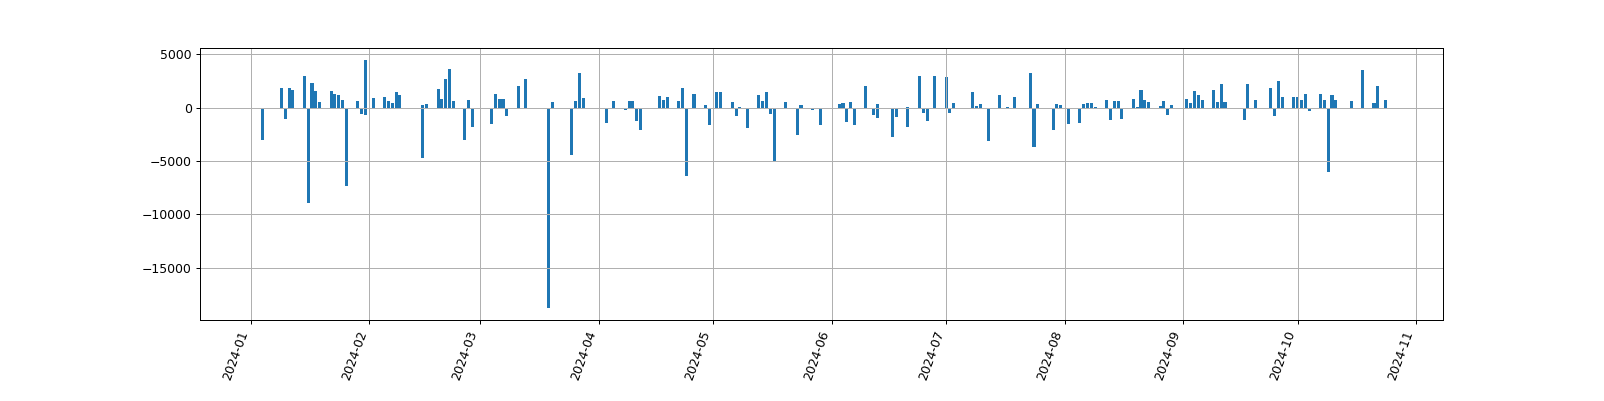

In [59]:
fig, ax = plt.subplots(1, figsize=(20, 5))
ax.grid()
fig.autofmt_xdate()
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=0.20)
plt.bar(dfFinal[dfFinal.columns.values[0]], dfFinal[dfFinal.columns.values[7]])
plt.show()

## Resultado

In [55]:
df_tot_mes_format

,Mês,Resultado (R$),Porcentagem,Total Lucros,Total Perdas,Qt Lucros,Qt Perdas
mes,,,,,,,
1,January,634.83,2.91%,"22,417.17","-21,782.34",13,6
2,February,"6,715.72",14.26%,"16,541.72","-9,826.00",15,5
3,March,"-12,765.31",-15.55%,"12,881.01","-25,646.32",9,4
4,April,"-4,707.38",-7.26%,"8,404.63","-13,112.01",10,6
5,May,"-5,267.43",-12.15%,"7,501.55","-12,768.98",10,7
6,June,"-3,022.35",-18.88%,"9,547.36","-12,569.71",9,10
7,July,"2,068.86",8.81%,"11,643.42","-9,574.56",13,5
8,August,"2,087.62",5.69%,"7,979.98","-5,892.36",15,5
9,September,"16,716.37",34.47%,"19,102.93","-2,386.56",16,3


### ======================================== TESTES ========================================

In [56]:
bla

NameError: name 'bla' is not defined

from subprocess import Popen
p = Popen("Executa.bat", cwd=r"C:\Users\esmer\Desktop\Alexandre\Projeto Git\StockManager")
stdout, stderr = p.communicate()

In [ ]:
import pandas as pd

example = {'Team':['Australia', 'England', 'South Africa',
                   'Australia', 'England', 'India', 'India',
                        'South Africa', 'England', 'India'],
                          
           'Player':['Ricky Ponting', 'Joe Root', 'Hashim Amla',
                     'David Warner', 'Jos Buttler', 'Virat Kohli',
                     'Rohit Sharma', 'David Miller', 'Eoin Morgan',
                                                 'Dinesh Karthik'],
                                                   
          'Runs':[345, 336, 689, 490, 989, 672, 560, 455, 342, 376],
            
          'Salary':[34500, 33600, 68900, 49000, 98899,
                    67562, 56760, 45675, 34542, 31176] }
  
dfa = pd.DataFrame(example)

In [ ]:
dfa

In [ ]:
total_salary = dfa.groupby(['Team', 'Runs']).mean('Salary')

In [ ]:
total_salary

In [ ]:
df_agg = dfFinal.loc[dfFinal['Data da Operação'] > '2021-11-01']
df_agg

In [ ]:
df_agg.loc('2021-11-03':'2021-11-10', 'Data da Operação')

In [ ]:
df_agg.groupby(['Data da Operação', 'Tipo Operação', 'Ativo']) \
              .agg(teste1 = ('%', 'mean'), teste2 = ('Lucro/Perda (R$)', 'mean')) \
              .sort_values(['Data da Operação', 'Tipo Operação'], ascending=[True, False])

In [ ]:
df_teste = dfFinal.loc[dfFinal['Data da Operação'] > '2023-01-15'].groupby(['Data da Operação', 'Tipo Operação']).sum(['Lucro/Perda (R$)', 'Valor Compra'])

In [ ]:
del df_teste['Preço (R$)']
del df_teste['%']

In [ ]:
df_teste['%'] = (df_teste['Lucro/Perda (R$)'] * 100) / df_teste['Valor Compra']

In [ ]:
df_teste